In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:14<00:00, 163MB/s]
100% 1.06G/1.06G [00:14<00:00, 80.4MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [111]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [112]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [113]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [114]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [115]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_6 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_7 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [116]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [117]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 71s 107ms/step - loss: 1.1802 - accuracy: 0.5495 - val_loss: 0.6663 - val_accuracy: 0.5468
Epoch 2/10
625/625 [==============================] - 68s 109ms/step - loss: 0.6635 - accuracy: 0.5893 - val_loss: 0.7392 - val_accuracy: 0.6054
Epoch 3/10
625/625 [==============================] - 65s 104ms/step - loss: 0.6434 - accuracy: 0.6120 - val_loss: 0.6304 - val_accuracy: 0.6026
Epoch 4/10
625/625 [==============================] - 69s 109ms/step - loss: 0.6034 - accuracy: 0.6674 - val_loss: 0.5253 - val_accuracy: 0.7274
Epoch 5/10
625/625 [==============================] - 66s 106ms/step - loss: 0.5192 - accuracy: 0.7290 - val_loss: 0.5387 - val_accuracy: 0.7102
Epoch 6/10
625/625 [==============================] - 69s 110ms/step - loss: 0.4452 - accuracy: 0.7713 - val_loss: 0.4315 - val_accuracy: 0.7936
Epoch 7/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3906 - accuracy: 0.7987 - val_loss: 0.4211 - val_ac

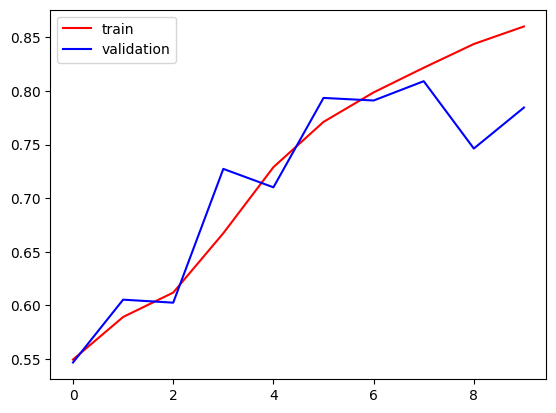

In [118]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

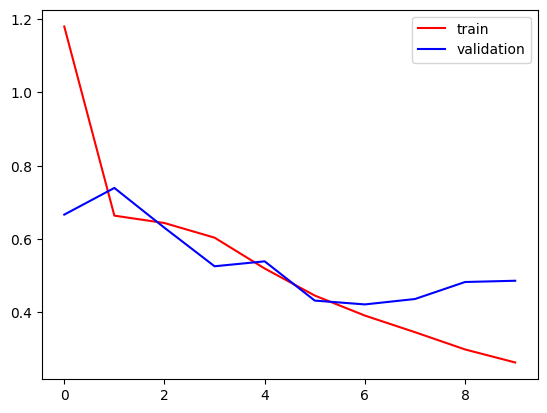

In [119]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [120]:
import cv2

In [133]:
test_img=cv2.imread('/content/cat.jpg')

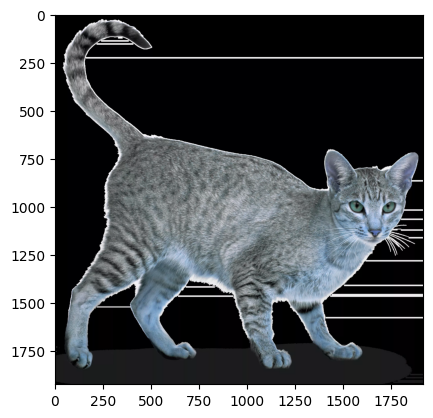

In [134]:
plt.imshow(test_img)

In [135]:
test_img.shape

(1925, 1920, 3)

In [136]:
test_img = cv2.resize(test_img,(256,256))

In [137]:
test_input = test_img.reshape((1,256,256,3))

In [138]:
model.predict(test_input)

1/1 [==============================] - 0s 28ms/step


array([[1.]], dtype=float32)